### Workshop - 1: K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [1]:
# The Visualization file is common across the kmeans and decision tree files.
# The proper visualization indicates that the features across all targets are fairly distinct and that is why the        model accuracy should be good after a nominal input 


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

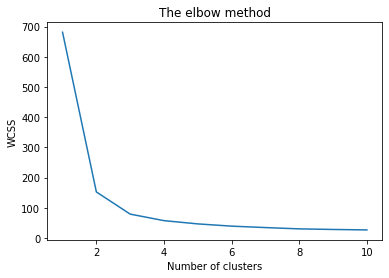

In [2]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
x = iris_df.iloc[:, [0, 1, 2, 3]].values
#print(x)
y=iris.target

wcss=[KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x).inertia_ for i in range(1,11)]  
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [3]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Lets look at the actual and predicted values

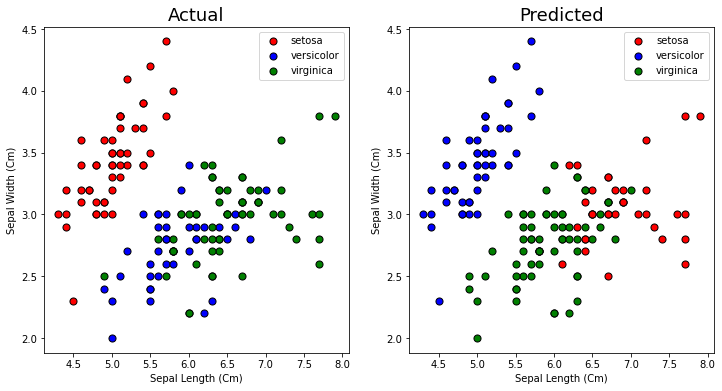

In [4]:
# Visualising the clusters - On the first two columns
fig, axes = plt.subplots(1, 2 ,figsize=(12,6))
colors=['red','blue','green']
for i in range(0,len(iris.target_names)):
    axes[0].scatter(x[y == i, 0], x[y == i, 1], 
        s = 50, c = colors[i], label = iris.target_names[i],edgecolor='k')
    axes[1].scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], 
        s = 50, c = colors[i], label = iris.target_names[i],edgecolor='k')


axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
for i in range(0,len(axes)):
    axes[i].set_xlabel(iris.feature_names[0].title())
    axes[i].set_ylabel(iris.feature_names[1].title())

axes[0].legend()
axes[1].legend()



### Scoring and evaluating models

In [5]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=1)
ypred=kmeans.predict(x_test)

from sklearn import metrics  
print('MAE: ',metrics.mean_absolute_error(y_test, ypred))
print('r2_score: ',metrics.r2_score(y_test, ypred))
print('MSE :',metrics.mean_squared_error(y_test, ypred))
print('ME :',metrics.max_error(y_test, ypred))

MAE:  1.1555555555555554
r2_score:  -1.6688632619439874
MSE : 1.6
ME : 2


### User input for prediction

In [7]:
inputs=[float(input("Enter " + feature_name)) for feature_name in iris.feature_names]
print("The predicted flower is :",iris.target_names[kmeans.predict([inputs])].item())

The predicted flower is : versicolor
